In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("survey_results_public.csv")

In [2]:
df = df[["Country","EdLevel", "YearsCodePro","Employment","ConvertedCompYearly"]]
df = df.rename({"ConvertedCompYearly":"Salary"}, axis = 1)
df.head()

,Country,EdLevel,YearsCodePro,Employment,Salary
0,United States of America,Primary/elementary school,NaN,"Employed, full-time",NaN
1,United Kingdom of Great Britain and Northern I...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",17,"Employed, full-time",NaN
2,United Kingdom of Great Britain and Northern I...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",27,"Employed, full-time",NaN
3,Canada,Some college/university study without earning ...,NaN,"Student, full-time",NaN
4,Norway,"Secondary school (e.g. American high school, G...",NaN,"Student, full-time",NaN


In [3]:
df = df[df["Salary"].notnull()]
df.head()

,Country,EdLevel,YearsCodePro,Employment,Salary
72,Pakistan,"Secondary school (e.g. American high school, G...",1,"Employed, full-time;Student, full-time;Indepen...",7322.0
374,Austria,"Professional degree (JD, MD, Ph.D, Ed.D, etc.)",6,"Employed, full-time",30074.0
379,Turkey,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",6,"Employed, full-time",91295.0
385,France,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",17,"Independent contractor, freelancer, or self-em...",53703.0
389,United States of America,Some college/university study without earning ...,7,"Employed, full-time;Student, part-time",110000.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 23435 entries, 72 to 41187
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Country       23435 non-null  object 
 1   EdLevel       23435 non-null  object 
 2   YearsCodePro  23345 non-null  object 
 3   Employment    23435 non-null  object 
 4   Salary        23435 non-null  float64
dtypes: float64(1), object(4)
memory usage: 1.1+ MB


In [5]:
df = df.dropna()
df.isnull().sum()

Country         0
EdLevel         0
YearsCodePro    0
Employment      0
Salary          0
dtype: int64

In [6]:
df = df[df["Employment"] == "Employed, full-time"]
df = df.drop("Employment", axis=1)
df.head()

,Country,EdLevel,YearsCodePro,Salary
374,Austria,"Professional degree (JD, MD, Ph.D, Ed.D, etc.)",6,30074.0
379,Turkey,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",6,91295.0
392,United Kingdom of Great Britain and Northern I...,"Professional degree (JD, MD, Ph.D, Ed.D, etc.)",18,161044.0
395,United Kingdom of Great Britain and Northern I...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",25,121018.0
398,United States of America,Some college/university study without earning ...,30,195000.0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 17527 entries, 374 to 41185
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Country       17527 non-null  object 
 1   EdLevel       17527 non-null  object 
 2   YearsCodePro  17527 non-null  object 
 3   Salary        17527 non-null  float64
dtypes: float64(1), object(3)
memory usage: 684.6+ KB


In [8]:
df["Country"].value_counts()

Country
United States of America                                3903
Germany                                                 1491
United Kingdom of Great Britain and Northern Ireland    1141
Ukraine                                                 1017
India                                                    836
                                                        ... 
Kosovo                                                     1
Oman                                                       1
Guyana                                                     1
Angola                                                     1
Mali                                                       1
Name: count, Length: 155, dtype: int64

In [9]:
df["Country"].values

array(['Austria', 'Turkey',
       'United Kingdom of Great Britain and Northern Ireland', ...,
       'Sweden', 'United States of America', 'United States of America'],
      dtype=object)

In [10]:
df["Country"].values[0]

'Austria'

In [11]:
def shorten_categories(categories, limit):
    categorical_map = {}
    for i in range(len(categories)):
        if categories.values[i] >= limit:
            categorical_map[categories.index[i]] = categories.index[i]
        else:
            categorical_map[categories.index[i]] = "Other"
    return categorical_map

In [12]:
category_map = shorten_categories(df["Country"].value_counts(), 350)
df["Country"] = df["Country"].map(category_map)
df["Country"].value_counts()

Country
Other                                                   5258
United States of America                                3903
Germany                                                 1491
United Kingdom of Great Britain and Northern Ireland    1141
Ukraine                                                 1017
India                                                    836
France                                                   719
Canada                                                   684
Brazil                                                   457
Spain                                                    431
Italy                                                    414
Netherlands                                              406
Australia                                                400
Sweden                                                   370
Name: count, dtype: int64

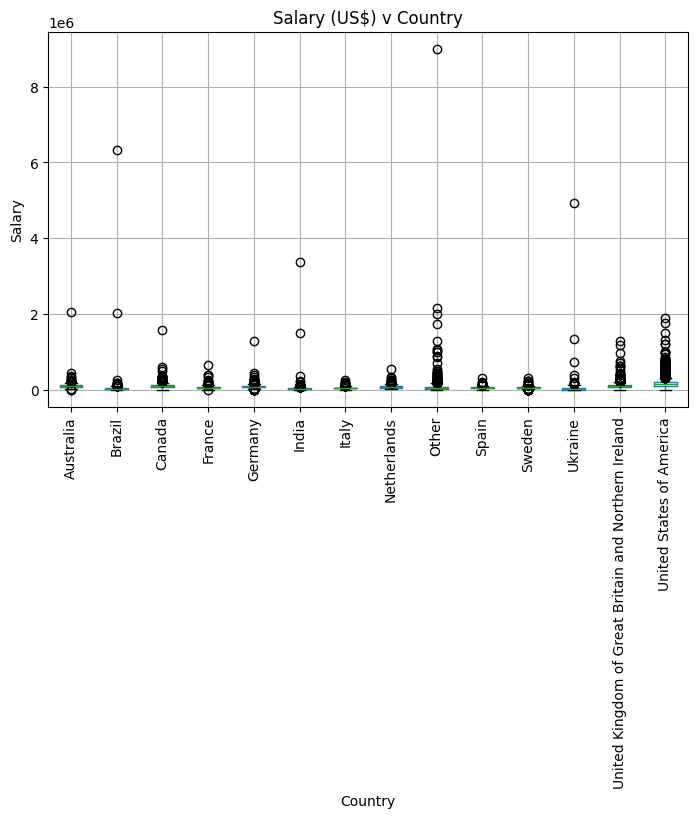

In [13]:
fig, ax = plt.subplots(1,1, figsize=(8,5))
df.boxplot(column='Salary',by='Country', ax=ax)
plt.title('Salary (US$) v Country')
plt.suptitle('')
plt.ylabel('Salary')
plt.xticks(rotation=90)
plt.show()

In [14]:
df = df[df["Salary"] <= 250000]
df = df[df["Salary"] >= 10000]
df = df[df["Country"] != "Other"]


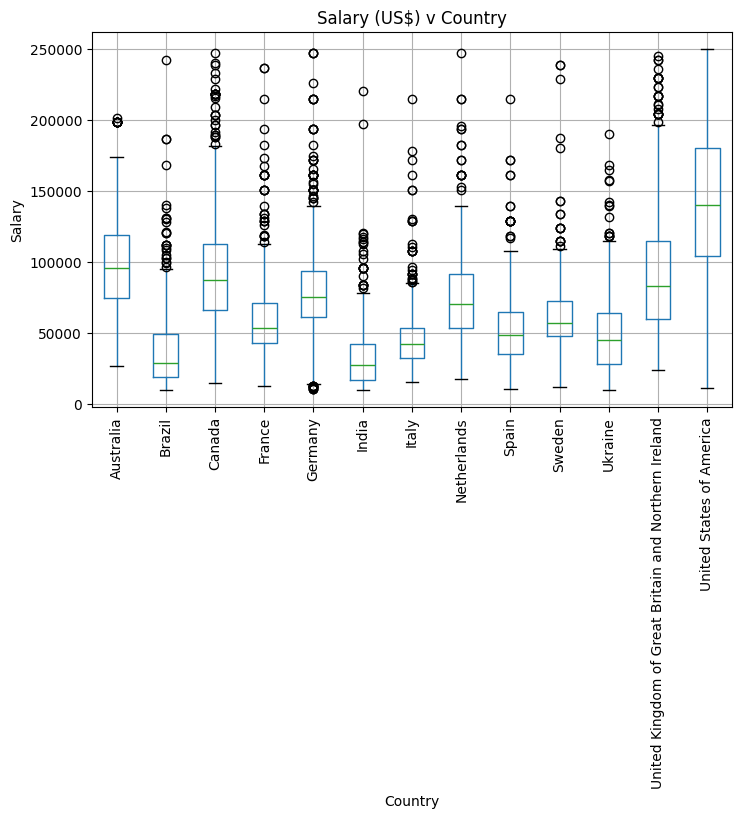

In [15]:
fig, ax = plt.subplots(1,1, figsize=(8,5))
df.boxplot(column='Salary',by='Country', ax=ax)
plt.title('Salary (US$) v Country')
plt.suptitle('')
plt.ylabel('Salary')
plt.xticks(rotation=90)
plt.show()

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11059 entries, 392 to 41185
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Country       11059 non-null  object 
 1   EdLevel       11059 non-null  object 
 2   YearsCodePro  11059 non-null  object 
 3   Salary        11059 non-null  float64
dtypes: float64(1), object(3)
memory usage: 432.0+ KB


In [17]:
df["YearsCodePro"].unique()

array(['18', '25', '30', '50', '27', '1', '15', '11', '23', '17', '10',
       '8', '12', '26', '40', '4', '9', '22', '28', '20', '16', '13', '3',
       '35', '5', '31', '41', '36', '6', '14', '7', 'Less than 1 year',
       '24', '2', '38', '32', '21', '19', '34', '29', '43', '33', '45',
       '37', '44', '42', '39', '46', '49', '48', '47'], dtype=object)

In [18]:
def clean_expreince(x):
    if x == "Less than 1 year":
        return 0.5
    return float(x)

df["YearsCodePro"] = df["YearsCodePro"].apply(clean_expreince)

In [19]:
df["EdLevel"].unique()

array(['Professional degree (JD, MD, Ph.D, Ed.D, etc.)',
       'Master’s degree (M.A., M.S., M.Eng., MBA, etc.)',
       'Some college/university study without earning a degree',
       'Bachelor’s degree (B.A., B.S., B.Eng., etc.)',
       'Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)',
       'Associate degree (A.A., A.S., etc.)', 'Primary/elementary school',
       'Something else'], dtype=object)

In [20]:
def clean_education(x):
    if 'Professional degree' in x:
        return 'Professional degree'
    if 'Master’s degree' in x:
        return 'Master’s degree'
    if 'Bachelor’s degree' in x:
        return 'Bachelor’s degree'
    return 'Less than Bachelors'

df["EdLevel"] = df["EdLevel"].apply(clean_education)

In [21]:
df["EdLevel"].unique()

array(['Professional degree', 'Master’s degree', 'Less than Bachelors',
       'Bachelor’s degree'], dtype=object)

In [22]:
from sklearn.preprocessing import LabelEncoder
education_encoder = LabelEncoder()
df['EdLevel'] = education_encoder.fit_transform(df['EdLevel'])
df["EdLevel"].unique()

array([3, 2, 1, 0])

In [23]:
country_encoder = LabelEncoder()
df['Country'] = country_encoder.fit_transform(df['Country'])
df["Country"].unique()

array([11, 12,  3,  4,  1,  2,  6,  5, 10,  8,  7,  9,  0])

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11059 entries, 392 to 41185
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Country       11059 non-null  int32  
 1   EdLevel       11059 non-null  int32  
 2   YearsCodePro  11059 non-null  float64
 3   Salary        11059 non-null  float64
dtypes: float64(2), int32(2)
memory usage: 345.6 KB


In [25]:
X = df.drop("Salary", axis=1)
y = df["Salary"]

In [26]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [27]:
from sklearn.linear_model import LinearRegression
linear_regression = LinearRegression()
linear_regression.fit(x_train, y_train)
y_pred = linear_regression.predict(x_test)

y_pred[:5]

array([62454.96506305, 64232.11658381, 64737.03893639, 84419.23662163,
       78387.11240067])

In [28]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)

Mean Squared Error (MSE): 2017900245.3098435
Mean Absolute Error (MAE): 35505.17180739839


In [29]:
from sklearn.tree import DecisionTreeRegressor
decison_tree_regression = DecisionTreeRegressor(random_state=0)
decison_tree_regression.fit(x_train, y_train)
y_pred = decison_tree_regression.predict(x_test)

y_pred[:5]

array([64134.17647059, 23001.94285714, 78879.12      , 45647.57142857,
       91044.55555556])

In [30]:
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)

Mean Squared Error (MSE): 1281423599.300152
Mean Absolute Error (MAE): 25662.478387605108


In [31]:
from sklearn.ensemble import RandomForestRegressor
random_forest_regression = RandomForestRegressor(random_state=0)
random_forest_regression.fit(x_train, y_train)
y_pred = random_forest_regression.predict(x_test)

y_pred[:5]

array([63375.83814107, 23050.34732528, 79415.39399234, 45775.23143201,
       90461.6189705 ])

In [32]:
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)

Mean Squared Error (MSE): 1212723350.7608361
Mean Absolute Error (MAE): 25041.266756871435


In [33]:
from sklearn.model_selection import GridSearchCV
max_depth = [None, 2,4,6,8,10,12]
parameters = {"max_depth":max_depth}

regressor = DecisionTreeRegressor(random_state=0)
gs = GridSearchCV(regressor, parameters, scoring='neg_mean_squared_error')
gs.fit(x_train, y_train)

GridSearchCV(estimator=DecisionTreeRegressor(random_state=0),
             param_grid={'max_depth': [None, 2, 4, 6, 8, 10, 12]},
             scoring='neg_mean_squared_error')

In [34]:
regressor = gs.best_estimator_
regressor.fit(x_train, y_train)
y_pred = regressor.predict(x_test)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)

Mean Squared Error (MSE): 1153341223.4079843
Mean Absolute Error (MAE): 24560.462870887615


In [35]:
X

,Country,EdLevel,YearsCodePro
392,11,3,18.0
395,11,2,25.0
398,12,1,30.0
409,3,3,50.0
414,11,0,27.0
...,...,...,...
41164,12,0,13.0
41167,12,1,25.0
41180,9,2,3.0
41184,12,2,30.0


In [36]:
# country, edlevel, yearscode
X = np.array([["United States of America", 'Master’s degree', 15 ]])
X

array([['United States of America', 'Master’s degree', '15']],
      dtype='<U24')

In [37]:
X[:, 0] = country_encoder.transform(X[:,0])
X[:, 1] = education_encoder.transform(X[:,1])
X = X.astype(float)
X

array([[12.,  2., 15.]])

In [38]:
y_pred = regressor.predict(X)
y_pred

c:\Users\PC\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


array([151892.75862069])

In [39]:
import pickle
data = {"model":regressor, "country_encoder":country_encoder, "education_encoder":education_encoder}
with open("saved_steps.pkl","wb") as file:
    pickle.dump(data,file)

with open("saved_steps.pkl","rb") as file:
    data = pickle.load(file)

regressor_loaded = data["model"]
country_encoder = data["country_encoder"]
education_encoder = data["education_encoder"]

In [40]:
y_pred = regressor_loaded.predict(X)
y_pred

c:\Users\PC\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


array([151892.75862069])